# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
-0.002
-0.002
-0.002
-0.002
0.0
-0.001
-0.002
-0.002
1.001
1.001
0.998
1.0
1.97
1.972
1.973
1.972
1.972
2.946
2.948
2.948
2.948
2.949
3.938
3.934
3.934
3.933
4.933
4.935
4.936
4.935
4.936
5.935
5.938
5.938
5.936
5.937
6.762
6.762
6.762
6.762
7.589
7.589
7.588
7.587
7.587
8.59
8.59
8.588
8.588
9.588
9.592
9.592
9.591
9.591
10.59
10.593
10.594
10.592
10.592
11.591
11.593
11.595
11.594
11.594
12.594
12.598
12.598
12.598
12.598
13.584
13.588
13.588
13.586
13.587
14.188
14.193
14.192
14.191
14.192
14.777
14.779
14.781
14.78
14.779
15.783
15.783
15.782
15.781
16.78
16.779
16.781
16.78
17.777
17.781
17.781
17.781
17.782
18.783
18.783
18.782
18.783
19.786
19.786
19.784
19.784
20.785
20.785
20.783
20.783
21.511
21.513
21.514
21.514
21.515
22.241
22.241
22.24
22.24
23.244
23.244
23.242
23.241
24.241
24.244
24.244
24.244
24.245
25.246
25.246
25.245
25.245
26.233
26.233
26.231
26.231
26.231
27.232
27.233
28.237


57.146
57.146
57.146
57.145
57.145
57.145
57.145
57.144
57.144
57.144
57.144
57.314
57.314
57.314
57.314
57.314
57.314
57.314
57.314
57.314
57.381
57.381
57.381
57.381
57.383
57.382
57.382
57.381
57.381
57.381
57.381
57.381
57.379
57.379
57.379
57.379
57.379
57.379
57.379
57.378
57.378
57.378
57.378
57.378
57.377
57.377
57.377
57.377
57.377
57.377
57.377
57.377
57.377
57.377
57.377
57.377
57.376
57.376
57.375
57.376
57.458
57.458
57.502
57.502
57.501
57.5
57.5
57.499
57.501
57.501
57.501
57.494
57.497
57.497
57.498
57.499
57.499
57.499
57.499
57.499
57.499
57.499
57.498
57.498
57.498
57.498
57.498
57.497
57.497
57.497
57.496
57.496
57.496
57.496
57.496
57.496
57.496
57.496
57.497
57.496
57.496
57.496
57.495
57.494
57.494
57.494
57.494
57.556
57.595
57.618
57.625
57.637
57.637
57.637
57.637
57.636
57.689
57.689
57.689
57.689
57.688
57.688
57.687
57.69
57.69
57.688
57.688
57.687
57.685
57.686
57.685
57.686
57.687
57.688
57.688
57.688
57.688
58.123
58.123
58.123
58.123
58.124
58.124
58.12

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1387,2774,59.827
1388,2776,59.828
1389,2778,59.828
1390,2780,59.827


<IPython.core.display.Javascript object>


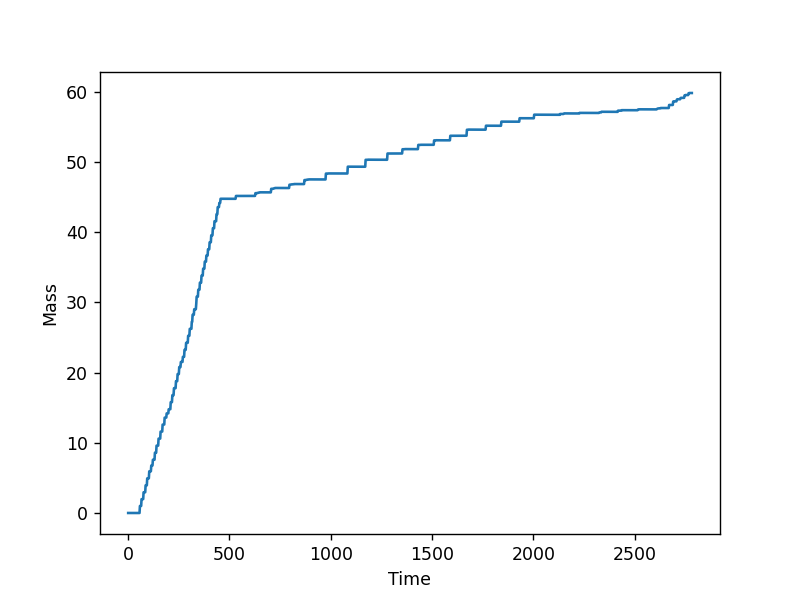

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_160523_S463-468.csv')